In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [233]:
df = pd.read_csv('Student_Performance.csv')

### Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [235]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


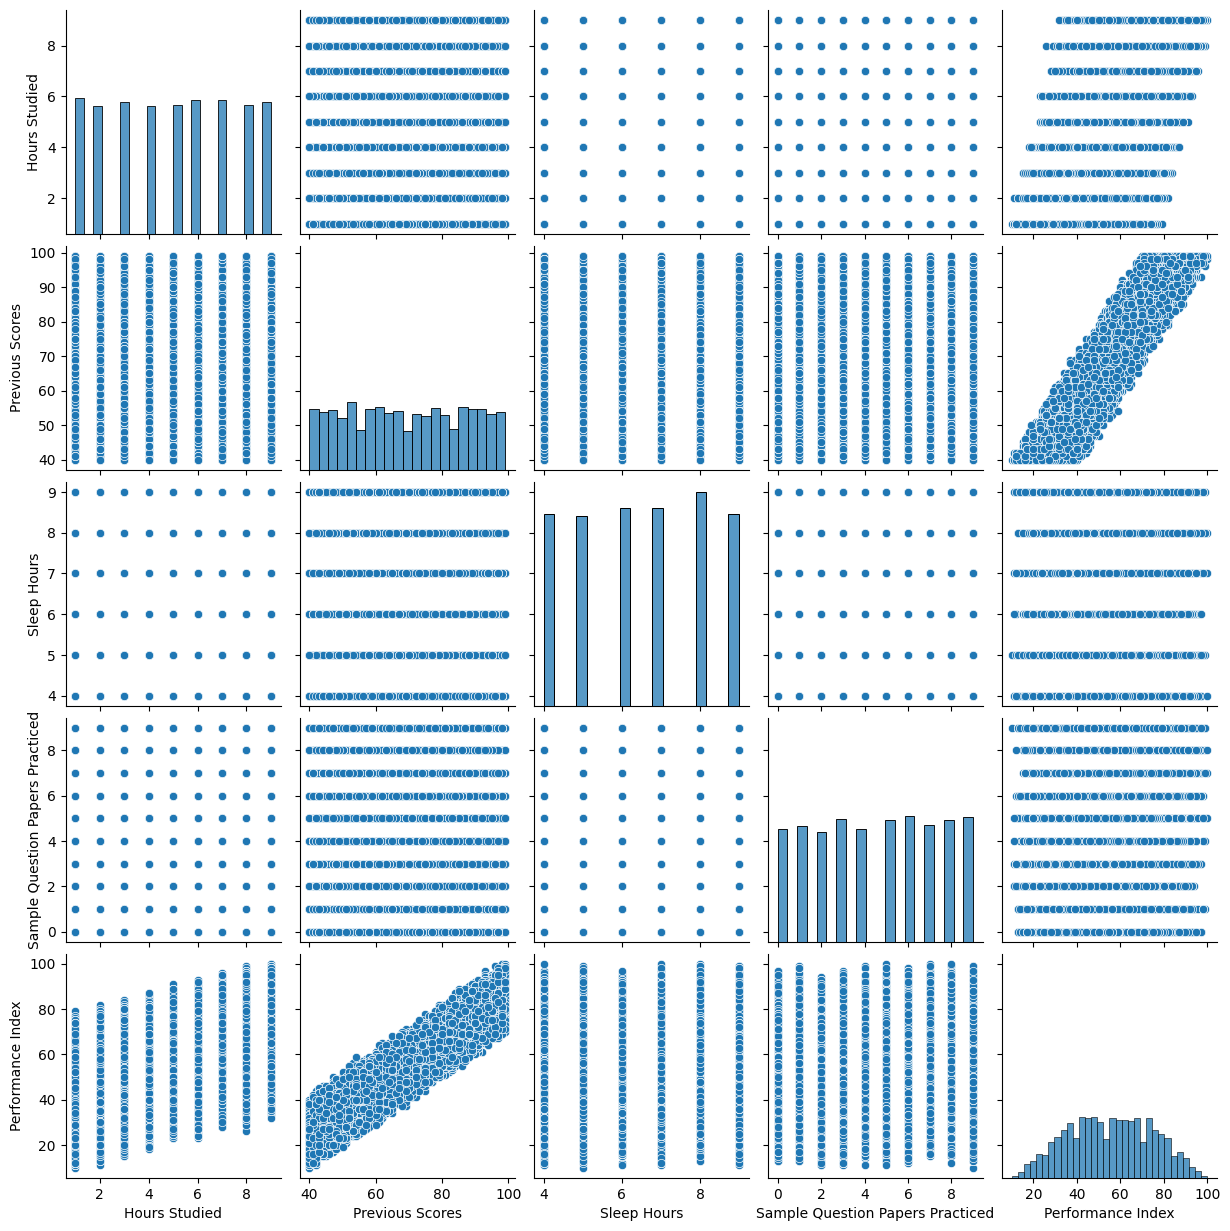

In [236]:
sns.pairplot(df)

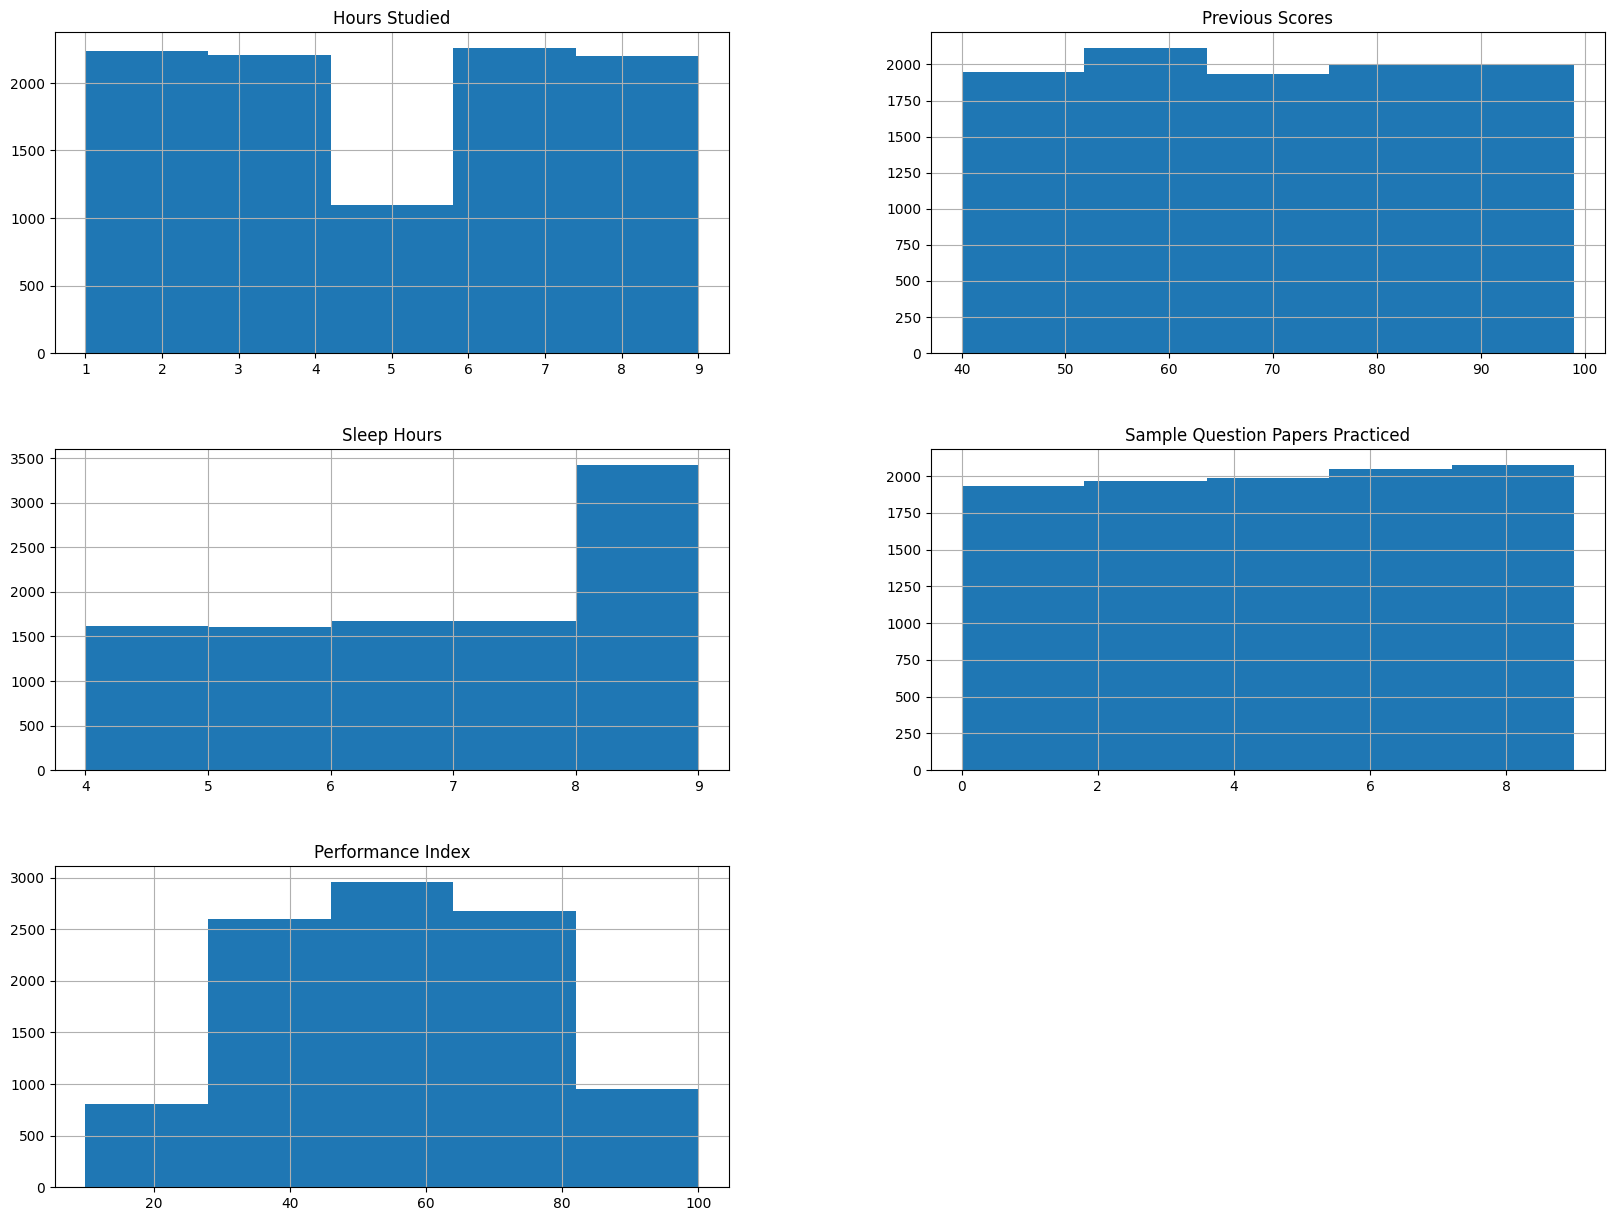

In [237]:
df.hist(bins=5, figsize=(20,15))
plt.show()

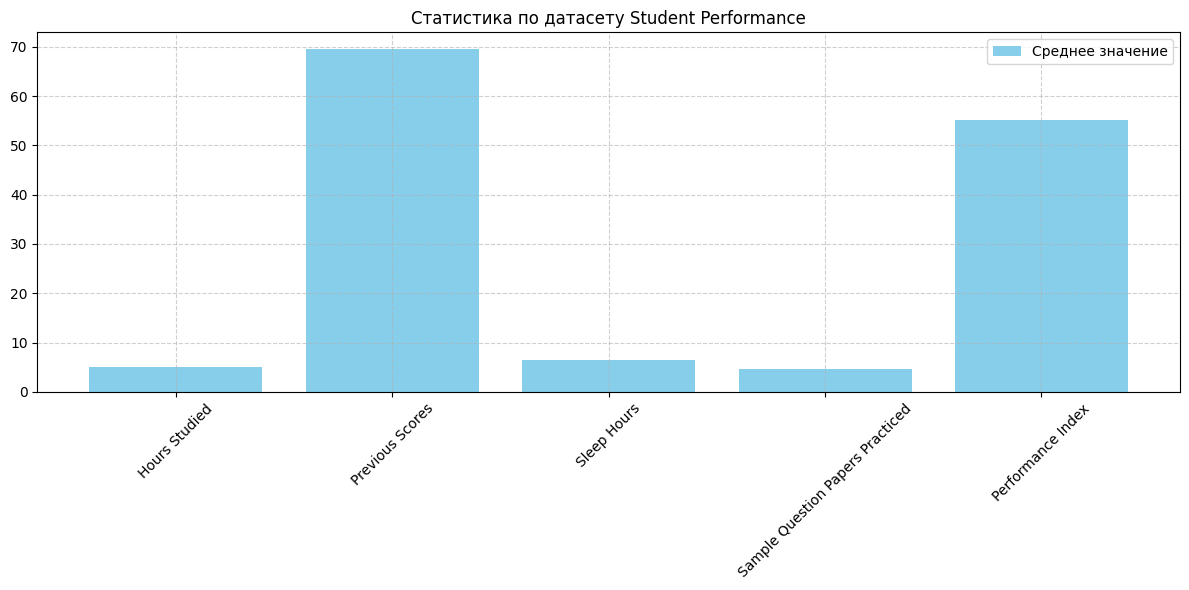

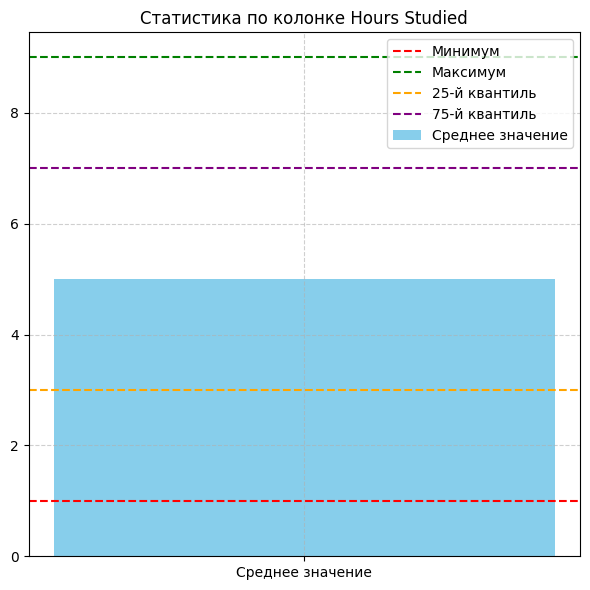

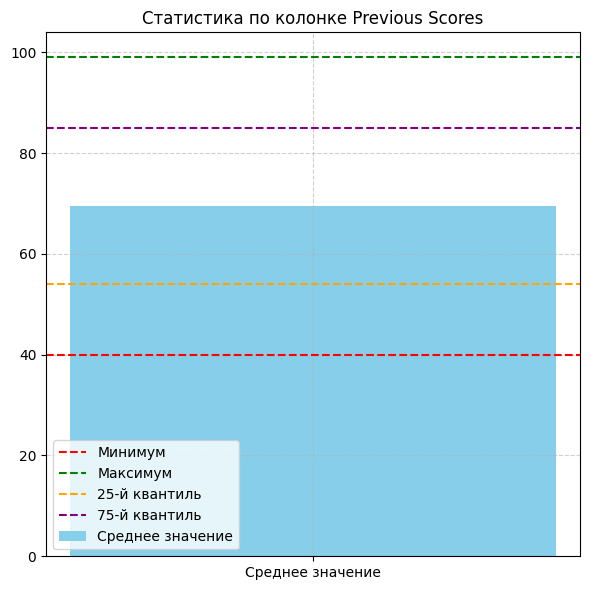

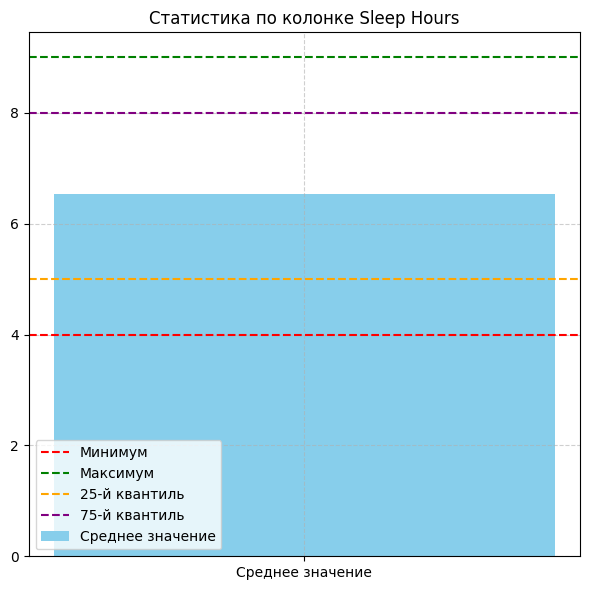

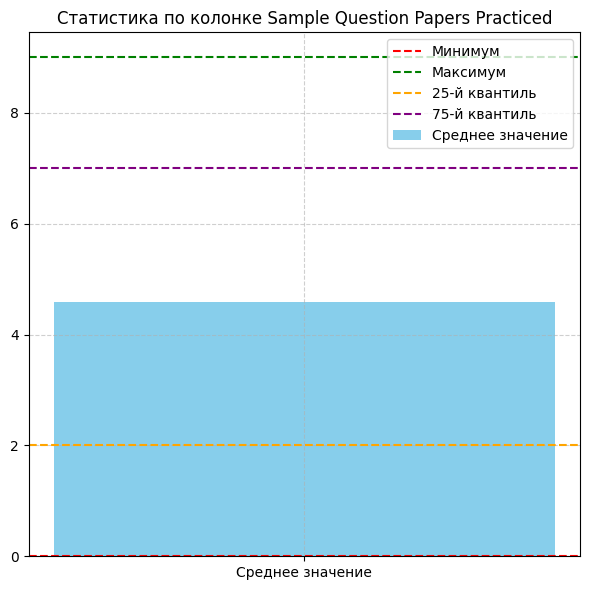

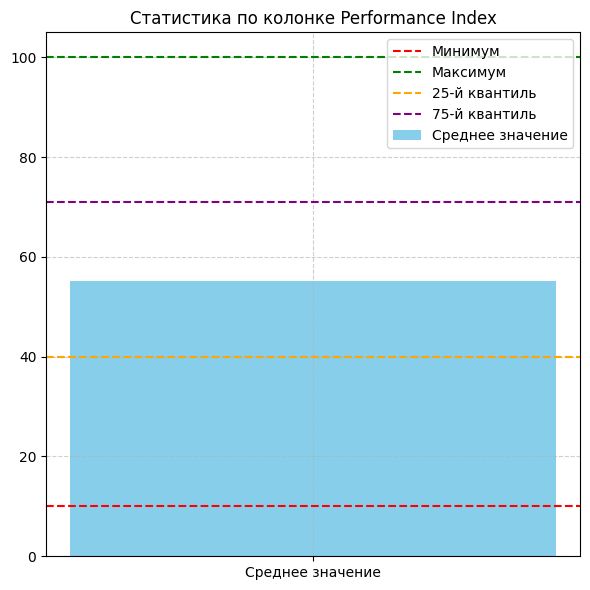

In [238]:
# Визуализируем статистику
statistics = df.describe()

plt.figure(figsize=(12, 6))
plt.title("Статистика по датасету Student Performance")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Создадим барплот для средних значений
plt.bar(statistics.columns, statistics.loc["mean"], color='skyblue', label='Среднее значение')

plt.legend()
plt.tight_layout()
plt.show()

for column in statistics.columns:
    plt.figure(figsize=(6, 6))
    plt.title(f"Статистика по колонке {column}")
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.bar(['Среднее значение'], statistics.loc["mean"][column], color='skyblue', label='Среднее значение')

    # Добавим линии для минимума, максимума и 25/75 квантилей
    plt.axhline(statistics.loc["min"][column], color='red', linestyle='--', label='Минимум')
    plt.axhline(statistics.loc["max"][column], color='green', linestyle='--', label='Максимум')
    plt.axhline(statistics.loc["25%"][column], color='orange', linestyle='--', label='25-й квантиль')
    plt.axhline(statistics.loc["75%"][column], color='purple', linestyle='--', label='75-й квантиль')

    plt.legend()
    plt.tight_layout()
    plt.show()


### Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

In [239]:
# Проверяем, есть ли отсутствующие значения в датасете
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Видим, что отсутствующих значений нет, поэтому можем перейти к кодированию категориальных признаков.
Для этого используем метод get_dummies из библиотеки pandas

In [240]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [241]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [242]:
# нормализация данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[df_encoded.columns] = scaler.fit_transform(df_encoded[df_encoded.columns])
df = df_encoded
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,0.775188,1.704176,1.456205,-1.249754,1.862167,1.010455
1,-0.383481,0.723913,-1.492294,-0.900982,0.508818,-0.989654
2,1.161410,-1.063626,0.276805,-0.900982,-0.532220,1.010455
3,0.002742,-1.005963,-0.902594,-0.900982,-1.000687,1.010455
4,0.775188,0.320275,0.866505,0.145333,0.560870,-0.989654


### Разделите данные на обучающий и тестовый наборы данных.

In [243]:
from sklearn.model_selection import train_test_split
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
X_train.shape

(7000, 5)

### Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas. Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [244]:
def linear_regression(X_train, y_train, X_test):
   # Добавляем единичный столбец к признакам для учета свободного члена в линейной регрессии
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    # Реализуем метод наименьших квадратов для нахождения оптимальных коэффициентов линейной регрессии
    # Используем формулу: beta = (X.T * X)^(-1) * X.T * y, где X - матрица признаков, y - вектор целевой переменной, beta - вектор коэффициентов
    beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    # Предсказываем значения целевой переменной на тестовом наборе данных, используя полученные коэффициенты
    y_pred = X_test.dot(beta)
    return beta, y_pred

In [245]:
beta, y_pred = linear_regression(X_train, y_train, X_test)
print("beta : ", beta)
print("y_pred : ", y_pred)

beta :  [-1.97130397e-04  3.83873168e-01  9.18721480e-01  4.38837682e-02
  2.87934341e-02  1.52986423e-02]
y_pred :  [-1.30409875 -0.86008803  0.03767704 ... -0.15971908  0.9310799
  1.31712263]


In [246]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.988867441668614

In [247]:
#сверим с результатами sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.988867441668614

### .
- Постройте **три модели** с различными наборами признаков
- Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.
- Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.

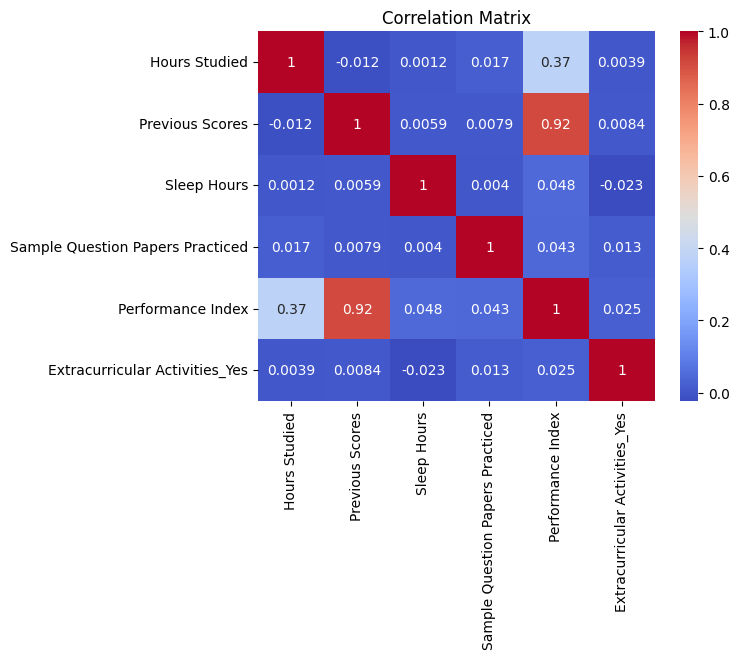

In [248]:
# create correlation matrix
corr_matrix = df.corr()

# visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Set1: "Hours Studied", "Extracurricular Activities",  "Sleep Hours"

In [249]:
X = df[["Hours Studied", "Extracurricular Activities_Yes",  "Sleep Hours"]]
X.head()


,Hours Studied,Extracurricular Activities_Yes,Sleep Hours
0,0.775188,1.010455,1.456205
1,-0.383481,-0.989654,-1.492294
2,1.161410,1.010455,0.276805
3,0.002742,1.010455,-0.902594
4,0.775188,-0.989654,0.866505


In [250]:
# Divide the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
X_train.shape

(7000, 3)

In [251]:
beta, y_pred = linear_regression(X_train, y_train, X_test)
r2_score(y_test, y_pred)

0.1413955704909824

Set2: "Hours Studied", "Previous Scores",  "Sample Question Papers Practiced"

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  float64
 1   Previous Scores                   10000 non-null  float64
 2   Sleep Hours                       10000 non-null  float64
 3   Sample Question Papers Practiced  10000 non-null  float64
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular Activities_Yes    10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [253]:
X = df[["Hours Studied", "Previous Scores",  "Sample Question Papers Practiced"]]
X.head()

,Hours Studied,Previous Scores,Sample Question Papers Practiced
0,0.775188,1.704176,-1.249754
1,-0.383481,0.723913,-0.900982
2,1.161410,-1.063626,-0.900982
3,0.002742,-1.005963,-0.900982
4,0.775188,0.320275,0.145333


In [254]:
# Divide the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
X_train.shape

(7000, 3)

In [255]:
beta, y_pred = linear_regression(X_train, y_train, X_test)
r2_score(y_test, y_pred)

0.9870632722078917

Set3: "Sleep Hours", "Previous Scores",  "Sample Question Papers Practiced"

In [256]:
X = df[["Sleep Hours", "Previous Scores",  "Sample Question Papers Practiced"]]
X.head()

,Sleep Hours,Previous Scores,Sample Question Papers Practiced
0,1.456205,1.704176,-1.249754
1,-1.492294,0.723913,-0.900982
2,0.276805,-1.063626,-0.900982
3,-0.902594,-1.005963,-0.900982
4,0.866505,0.320275,0.145333


In [257]:
# Divide the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
X_train.shape

(7000, 3)

In [258]:
beta, y_pred = linear_regression(X_train, y_train, X_test)
r2_score(y_test, y_pred)

0.8385001556492913

In [259]:
feature_sets = []
X = df.drop('Performance Index', axis=1)

for feature1 in X.columns:
    for feature2 in X.columns:
        for feature3 in X.columns:
            if feature1 != feature2 and feature1 != feature3 and feature2 != feature3:
                feature_set = [feature1, feature2, feature3]
                feature_set.sort()
                if feature_set not in feature_sets:
                    feature_sets.append(feature_set)

best_feature_set = None
best_r2_score = -1
features_and_score = pd.DataFrame(columns=["Feature1", "Feature2", "Feature3", "R2 Score"])

for features in feature_sets:
    X = df[features]
    y = df["Performance Index"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    
    beta, y_pred = linear_regression(X_train, y_train, X_test)
    
    r2 = r2_score(y_test, y_pred)
    features_and_score.loc[len(features_and_score)] = [*features, r2]
    
    if r2 > best_r2_score:
        best_feature_set = features
        best_r2_score = r2
print("Best feature set:", best_feature_set)
print("Best r2 score:", best_r2_score)
features_and_score_sorted = features_and_score.sort_values(by='R2 Score', ascending=False)
display(features_and_score_sorted)

Best feature set: ['Hours Studied', 'Previous Scores', 'Sleep Hours']
Best r2 score: 0.9877262677633761


,Feature1,Feature2,Feature3,R2 Score
0,Hours Studied,Previous Scores,Sleep Hours,0.987726
1,Hours Studied,Previous Scores,Sample Question Papers Practiced,0.987063
2,Extracurricular Activities_Yes,Hours Studied,Previous Scores,0.986507
7,Extracurricular Activities_Yes,Previous Scores,Sleep Hours,0.838894
6,Previous Scores,Sample Question Papers Practiced,Sleep Hours,0.838500
8,Extracurricular Activities_Yes,Previous Scores,Sample Question Papers Practiced,0.837094
3,Hours Studied,Sample Question Papers Practiced,Sleep Hours,0.142152
4,Extracurricular Activities_Yes,Hours Studied,Sleep Hours,0.141396
5,Extracurricular Activities_Yes,Hours Studied,Sample Question Papers Practiced,0.139923
9,Extracurricular Activities_Yes,Sample Question Papers Practiced,Sleep Hours,-0.001379


Для того, чтобы отсортировать признаки по вкладу, который они вносят в r2_score, можно использовать следующий алгоритм:

- Для каждого признака, посчитать, сколько раз он встречается в таблице, и какова сумма r2_score для всех комбинаций, в которых он участвует. Это даст нам оценку среднего вклада каждого признака в объяснение целевой переменной.
- Отсортировать признаки по убыванию среднего вклада, то есть по убыванию суммы r2_score, деленной на количество вхождений.
- Вывести отсортированный список признаков с соответствующими значениями среднего вклада.

In [260]:
features = {}
features_and_score_sorted
for index in range(len(features_and_score_sorted)):
    row = features_and_score_sorted.iloc[index]
    for feature in row[:-1]:
        if feature in features:
            features[feature]['sum'] += row['R2 Score']
            features[feature]['count'] += 1
        else:
            features[feature] = {'sum': row['R2 Score'], 'count': 1}
sorted_features = []
for feature in features:
    avg_contribution = features[feature]['sum'] / features[feature]['count']
    sorted_features.append((feature, avg_contribution))

sorted_features.sort(key=lambda x: x[1], reverse=True)
print('Sorted features by average contribution:')
for feature, avg_contribution in sorted_features:
    print('{}: {:.4f}'.format(feature, avg_contribution))
    

Sorted features by average contribution:
Previous Scores: 0.9126
Hours Studied: 0.5641
Sleep Hours: 0.4912
Sample Question Papers Practiced: 0.4906
Extracurricular Activities_Yes: 0.4904


### Ввести синтетический признак при построении модели

In [261]:
# Calculation of mutual information indicator
from sklearn.feature_selection import mutual_info_regression
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']
mi_sc = mutual_info_regression(X, y, random_state=0)
mi_sc= pd.Series(mi_sc, name="MI Scores", index=X.columns)
mi_sc = mi_sc.sort_values(ascending=False)
mi_sc

Previous Scores                     0.925841
Hours Studied                       0.148652
Sleep Hours                         0.009494
Sample Question Papers Practiced    0.006957
Extracurricular Activities_Yes      0.000000
Name: MI Scores, dtype: float64

In [262]:
from sklearn.preprocessing import PolynomialFeatures
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
r2_score_poly = r2_score(y_test, y_pred_poly)
r2_score_poly

0.98884801989229

In [263]:
df = pd.read_csv('Student_Performance.csv')
X = df.drop('Performance Index', axis=1)
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


In [264]:
df = pd.read_csv('Student_Performance.csv')
df = pd.get_dummies(df, drop_first=True)
df["Hours Per Paper"] = df["Hours Studied"] / df["Sample Question Papers Practiced"]
df.drop(["Hours Studied", "Sample Question Papers Practiced"], axis=1, inplace=True)
df.head()

,Previous Scores,Sleep Hours,Performance Index,Extracurricular Activities_Yes,Hours Per Paper
0,99,9,91.0,1,7.0
1,82,4,65.0,0,2.0
2,51,7,45.0,1,4.0
3,52,5,36.0,1,2.5
4,75,8,66.0,0,1.4


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Previous Scores                 10000 non-null  int64  
 1   Sleep Hours                     10000 non-null  int64  
 2   Performance Index               10000 non-null  float64
 3   Extracurricular Activities_Yes  10000 non-null  uint8  
 4   Hours Per Paper                 10000 non-null  float64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 322.4 KB


In [276]:
scaler = StandardScaler()
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

df[df.columns] = scaler.fit_transform(df[df.columns])
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score = r2_score(y_test, y_pred)
r2_score

0.86314665742412